In [44]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [45]:
fraud_data=pd.read_csv("Fraud_check.csv")

In [46]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [47]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [48]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [49]:
label_encoder = preprocessing.LabelEncoder()
fraud_data['Undergrad']= label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital.Status']= label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban']= label_encoder.fit_transform(fraud_data['Urban'])

In [50]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [51]:
taxable_income=[]
for value in fraud_data["Taxable.Income"]:
    if value <= 30000:
        taxable_income.append("Risky")
    else:
        taxable_income.append("Good")

In [52]:
x=fraud_data.drop(["Taxable.Income"],axis=1)

In [53]:
y=taxable_income

In [54]:
y

['Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Go

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [66]:
model_gini=DecisionTreeClassifier(criterion='gini',min_samples_split=5)

In [67]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

In [68]:
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.7

[Text(0.3565340909090909, 0.9705882352941176, 'City.Population <= 60294.5\ngini = 0.32\nsamples = 420\nvalue = [336, 84]\nclass = Risky'),
 Text(0.11294765840220386, 0.9117647058823529, 'City.Population <= 40128.5\ngini = 0.187\nsamples = 86\nvalue = [77, 9]\nclass = Risky'),
 Text(0.08264462809917356, 0.8529411764705882, 'Work.Experience <= 18.5\ngini = 0.339\nsamples = 37\nvalue = [29, 8]\nclass = Risky'),
 Text(0.07162534435261708, 0.7941176470588235, 'City.Population <= 36940.0\ngini = 0.435\nsamples = 25\nvalue = [17, 8]\nclass = Risky'),
 Text(0.0440771349862259, 0.7352941176470589, 'Marital.Status <= 0.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]\nclass = Risky'),
 Text(0.02203856749311295, 0.6764705882352942, 'Work.Experience <= 6.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = Good'),
 Text(0.011019283746556474, 0.6176470588235294, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Risky'),
 Text(0.03305785123966942, 0.6176470588235294, 'gini = 0.0\nsamples = 2\nvalue 

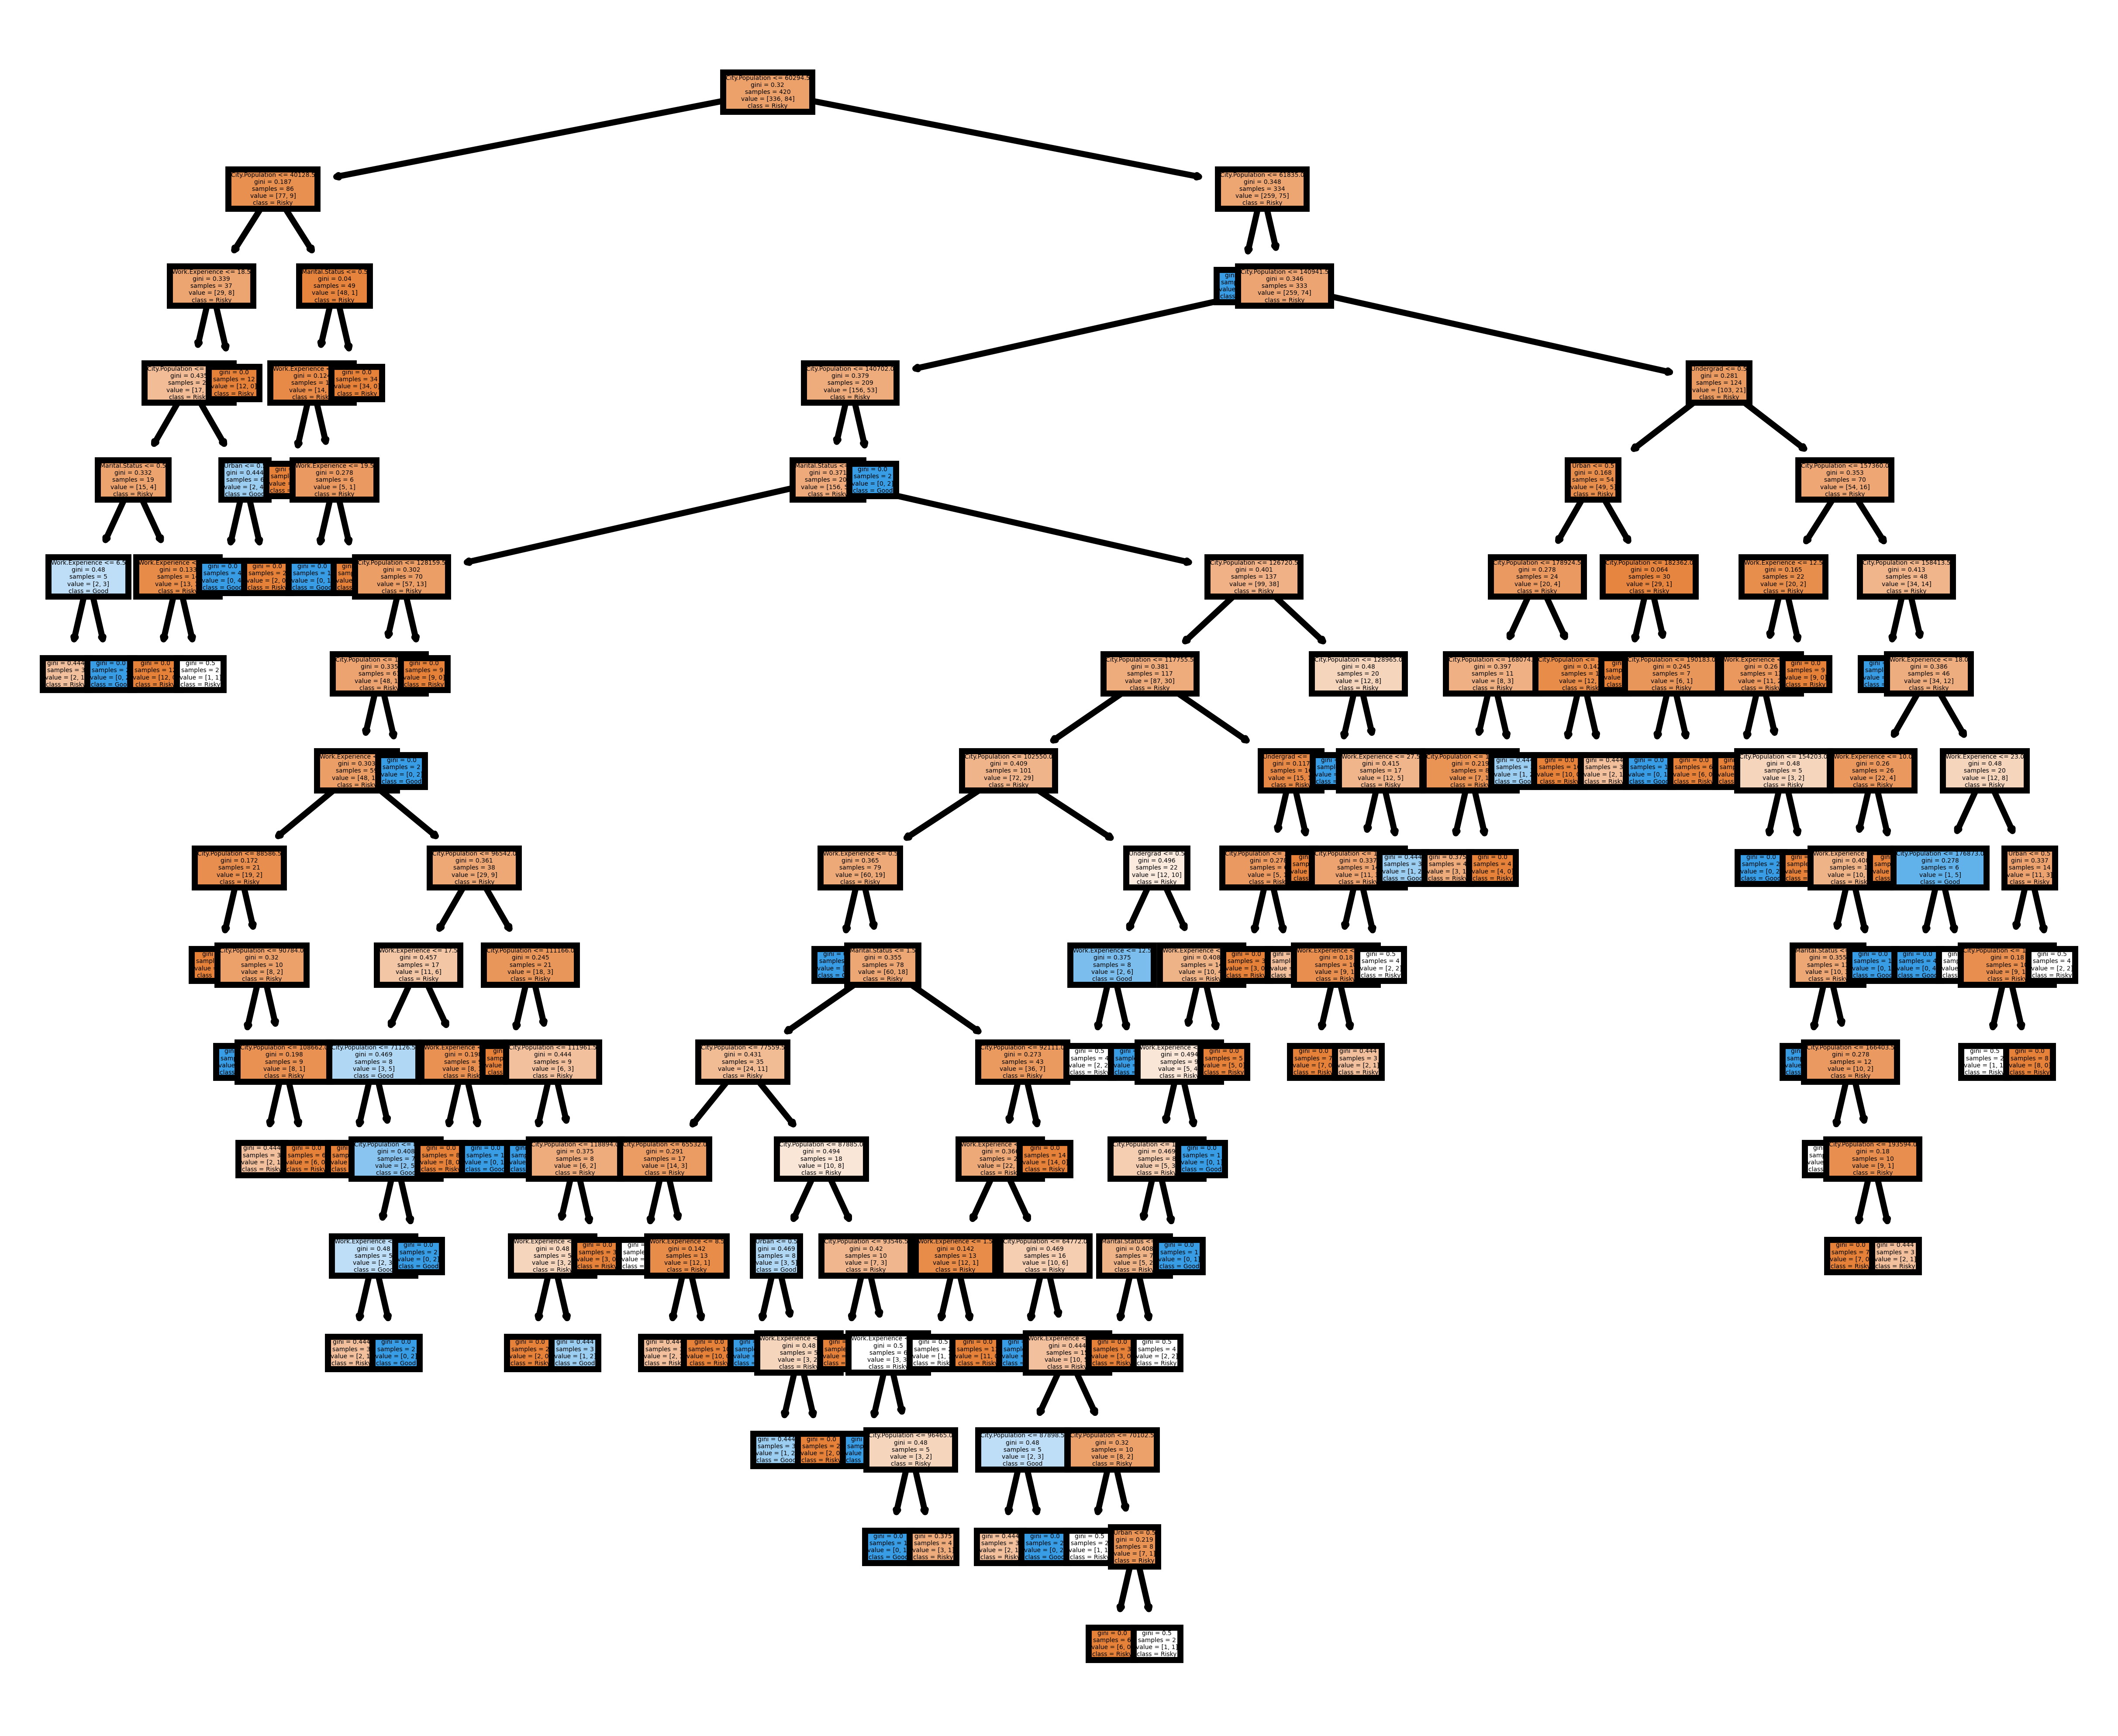

In [69]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=["Risky","Good"]
fig,axes = plt.subplots(nrows=1,ncols=1,figsize= (6,5),dpi=1000)
tree.plot_tree(model_gini,
               feature_names=fn,
               class_names=cn,
               filled= True)